In [1]:
import numpy as np
import pandas as pd
import json 
import nltk
import scipy.stats as ss
import seaborn as sns

In [2]:
from nltk.corpus import wordnet
##This is a common method which is widely used across the NLP community of practitioners and readers

def get_part_of_speech_tags(token):
    """Maps POS tags to first character lemmatize() accepts.
    We are focusing on Verbs, Nouns, Adjectives and Adverbs here."""

    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

    tag = nltk.pos_tag([token])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

In [3]:
def string_to_lexical(string):
    """ Returns a DataFrame wht the number of each lexical classes in the given string """
    
    tokenizer = TweetTokenizer()
    token_list = tokenizer.tokenize(string)
    df = pd.DataFrame([get_part_of_speech_tags(token) for token in token_list]).groupby(0).size()
    return df

In [4]:
full_data = pd.read_json('yelp_reviews_small.json',lines=True)
print(full_data.info())
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71315 entries, 0 to 71314
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0                71315 non-null  int64         
 1   review_id    71315 non-null  object        
 2   user_id      71315 non-null  object        
 3   business_id  71315 non-null  object        
 4   stars        71315 non-null  int64         
 5   useful       71315 non-null  int64         
 6   funny        71315 non-null  int64         
 7   cool         71315 non-null  int64         
 8   text         71315 non-null  object        
 9   date         71315 non-null  datetime64[ns]
 10  features     71315 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 6.0+ MB
None


,,review_id,user_id,business_id,stars,useful,funny,cool,text,date,features
0,613970,m5ecGXbh35Kqh4V9haxicA,OAEV6NodmkIQuBEnGjlPiA,KRNrssbpE1AKo48BIpdLw,5,0,0,0,Best sashimi ever Quality food Good service I ...,2019-01-19 23:22:09,"[-0.08915440000000001, 0.36107459999999997, 0...."
1,613971,8F44EKSVg2CvIn0AQf_8A,vBLpG8R3ulwGyomk9ZTtXQ,RHgZxgkzgCkOnz4qNl5Zg,5,0,0,0,Simply Fabulous is the picture of the flowers ...,2019-02-13 13:52:11,"[-0.105960484536082, 0.258084360824742, 0.3483..."
2,682814,rSo5E_ATEIqFMXYwBeWj_A,vNhLOpdCRecDih1K9z5smQ,C6QvZLrdEcw3YhKFekFYCw,5,0,0,0,Peace Frog is great\nThey provide wonderful cu...,2020-10-15 21:15:05,"[-0.144226787878787, 0.18622009090909, 0.19586..."
3,682815,1oOOQfdOafD7nmCQdy4CJg,_buzLtGGQr1CdqKgUxgvkw,5wqAfatUT_1WrCjaNBF5A,5,1,0,0,Went in for a Routine Check Up Noticed How Fa...,2020-02-27 21:51:57,"[-0.122542917647058, 0.002868647058823, 0.2630..."
4,613974,FBy9PwmWFf1j7qSGI3fesA,IDebflwD2Hl8mG8oj6DoQg,2hPkrbzphCtP_e2neIyBPg,5,1,0,1,I was a little nervous after reading a few rev...,2019-02-24 06:57:30,"[-0.158801581395348, 0.202358209302325, 0.3212..."


In [5]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
lexicalsTAG = full_data['text'].apply(string_to_lexical)
lexicalsTAG.head()

,a,n,r,v
0,3.0,9.0,4.0,1.0
1,6.0,68.0,10.0,15.0
2,5.0,30.0,2.0,3.0
3,1.0,28.0,3.0,4.0
4,6.0,31.0,1.0,7.0


In [6]:
lexicalsTAG.columns= ['ADJ','NOUN','VERB','ADV']

In [7]:
full_data=full_data.join(lexicalsTAG)
full_data.head()

,,review_id,user_id,business_id,stars,useful,funny,cool,text,date,features,ADJ,NOUN,VERB,ADV
0,613970,m5ecGXbh35Kqh4V9haxicA,OAEV6NodmkIQuBEnGjlPiA,KRNrssbpE1AKo48BIpdLw,5,0,0,0,Best sashimi ever Quality food Good service I ...,2019-01-19 23:22:09,"[-0.08915440000000001, 0.36107459999999997, 0....",3.0,9.0,4.0,1.0
1,613971,8F44EKSVg2CvIn0AQf_8A,vBLpG8R3ulwGyomk9ZTtXQ,RHgZxgkzgCkOnz4qNl5Zg,5,0,0,0,Simply Fabulous is the picture of the flowers ...,2019-02-13 13:52:11,"[-0.105960484536082, 0.258084360824742, 0.3483...",6.0,68.0,10.0,15.0
2,682814,rSo5E_ATEIqFMXYwBeWj_A,vNhLOpdCRecDih1K9z5smQ,C6QvZLrdEcw3YhKFekFYCw,5,0,0,0,Peace Frog is great\nThey provide wonderful cu...,2020-10-15 21:15:05,"[-0.144226787878787, 0.18622009090909, 0.19586...",5.0,30.0,2.0,3.0
3,682815,1oOOQfdOafD7nmCQdy4CJg,_buzLtGGQr1CdqKgUxgvkw,5wqAfatUT_1WrCjaNBF5A,5,1,0,0,Went in for a Routine Check Up Noticed How Fa...,2020-02-27 21:51:57,"[-0.122542917647058, 0.002868647058823, 0.2630...",1.0,28.0,3.0,4.0
4,613974,FBy9PwmWFf1j7qSGI3fesA,IDebflwD2Hl8mG8oj6DoQg,2hPkrbzphCtP_e2neIyBPg,5,1,0,1,I was a little nervous after reading a few rev...,2019-02-24 06:57:30,"[-0.158801581395348, 0.202358209302325, 0.3212...",6.0,31.0,1.0,7.0


<AxesSubplot:>

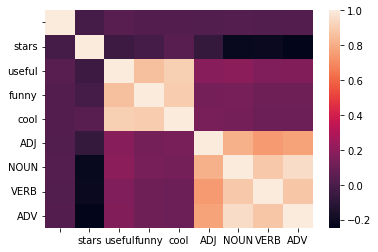

In [8]:
sns.heatmap(full_data.corr())

In [9]:
# Turn useful > 0 => all equal to 1  
full_data.loc[full_data.useful>0,'useful']=1

# Turn funny > 0 => all equal to 1  
full_data.loc[full_data.funny>0,'funny']=1

# Turn cool > 0 => all equal to 1  
full_data.loc[full_data.cool>0,'cool']=1

<AxesSubplot:xlabel='useful'>

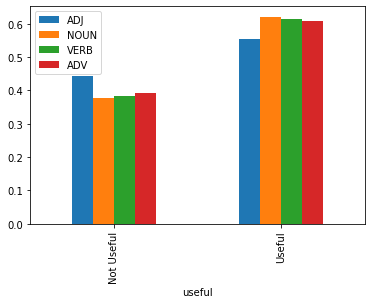

In [80]:
lexicals =  full_data[['useful','ADJ','NOUN','VERB','ADV']]
pd.set_option('display.max_columns', 500)
(lexicals.groupby('useful').median()/lexicals.groupby('useful').median().sum()).plot(kind='bar')

<AxesSubplot:xlabel='cool'>

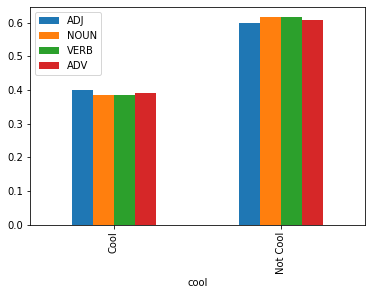

In [79]:
lexicals =  full_data[['cool','ADJ','NOUN','VERB','ADV']]
pd.set_option('display.max_columns', 500)
(lexicals.groupby('cool').median()/lexicals.groupby('cool').median().sum()).plot(kind='bar')

<AxesSubplot:xlabel='funny'>

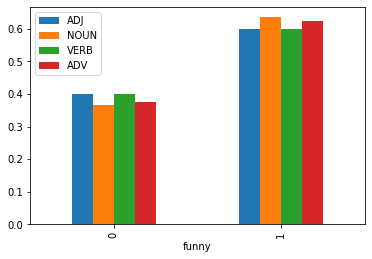

In [78]:
lexicals =  full_data[['funny','ADJ','NOUN','VERB','ADV']]
pd.set_option('display.max_columns', 500)
(lexicals.groupby('funny').median()/lexicals.groupby('funny').median().sum()).plot(kind='bar')

<AxesSubplot:>

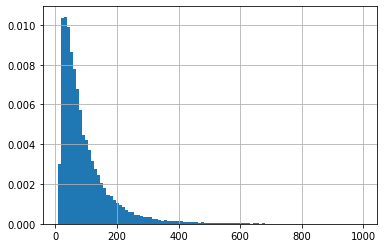

In [42]:
full_data.text.str.split().apply(len).hist(bins=100,density=True)

In [68]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_3996/3946298941.py:15: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  full_data.text.str.split().apply(len).hist(xrot=90,bins=100,density=True, by=full_data['useful'],sharex=True,ax=axs)


array([<AxesSubplot:title={'center':'Not Useful'}>,
       <AxesSubplot:title={'center':'Useful'}>], dtype=object)

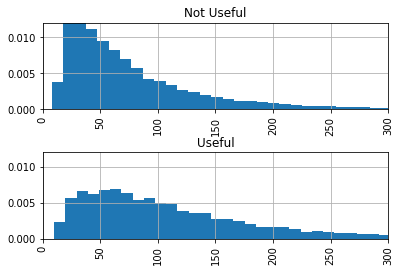

In [70]:
# le = preprocessing.LabelEncoder()
# le.fit(['Not Useful', 'Useful'])
# full_data['useful']=le.inverse_transform(full_data['useful'])

fig, axs = plt.subplots(2, 1)
axs[0].set_xlim(0, 300)
axs[1].set_xlim(0, 300)

axs[0].set_ylim(0, 0.012)
axs[1].set_ylim(0, 0.012)
# axs[0].set_xlabel('Number of Words')
# axs[0].set_ylabel('Useful')
axs[0].grid(True)
axs[1].grid(True)
full_data.text.str.split().apply(len).hist(xrot=90,bins=100,density=True, by=full_data['useful'],sharex=True,ax=axs)

/tmp/ipykernel_3996/3969619423.py:15: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  full_data.text.str.split().apply(len).hist(xrot=90,bins=100,density=True, by=full_data['cool'],sharex=True,ax=axs)


array([<AxesSubplot:title={'center':'Cool'}>,
       <AxesSubplot:title={'center':'Not Cool'}>], dtype=object)

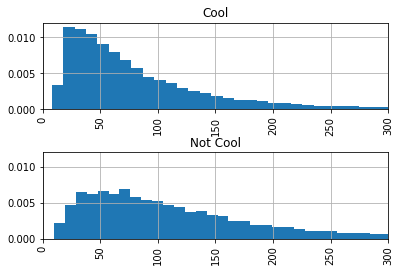

In [71]:
le = preprocessing.LabelEncoder()
le.fit(['Not Cool', 'Cool'])
full_data['cool']=le.inverse_transform(full_data['cool'])

fig, axs = plt.subplots(2, 1)
axs[0].set_xlim(0, 300)
axs[1].set_xlim(0, 300)

axs[0].set_ylim(0, 0.012)
axs[1].set_ylim(0, 0.012)
# axs[0].set_xlabel('Number of Words')
# axs[0].set_ylabel('Useful')
axs[0].grid(True)
axs[1].grid(True)
full_data.text.str.split().apply(len).hist(xrot=90,bins=100,density=True, by=full_data['cool'],sharex=True,ax=axs)

/tmp/ipykernel_3996/1956171429.py:15: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  full_data.text.str.split().apply(len).hist(xrot=90,bins=100,density=True, by=full_data['funny'],sharex=True,ax=axs)


array([<AxesSubplot:title={'center':'Funny'}>,
       <AxesSubplot:title={'center':'Not funny'}>], dtype=object)

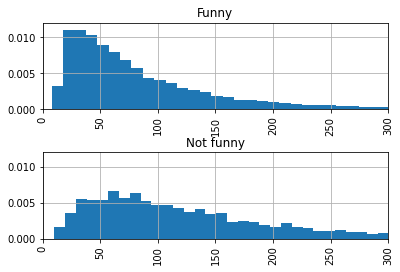

In [81]:
le = preprocessing.LabelEncoder()
le.fit(['Not funny', 'Funny'])
full_data['funny']=le.inverse_transform(full_data['funny'])

fig, axs = plt.subplots(2, 1)
axs[0].set_xlim(0, 300)
axs[1].set_xlim(0, 300)

axs[0].set_ylim(0, 0.012)
axs[1].set_ylim(0, 0.012)
# axs[0].set_xlabel('Number of Words')
# axs[0].set_ylabel('Useful')
axs[0].grid(True)
axs[1].grid(True)
full_data.text.str.split().apply(len).hist(xrot=90,bins=100,density=True, by=full_data['funny'],sharex=True,ax=axs)

In [84]:
from textblob import TextBlob
TextBlob("pizza is great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [87]:
result = pd.DataFrame(columns=['polarity','subjectivity'])
result['sentiment'] = full_data['text'].apply(lambda doc: TextBlob(doc).sentiment)
result = result['sentiment'].apply(pd.Series)
result.columns=['polarity','subjectivity']
full_data = full_data.join(result)

In [92]:
col = ['polarity',	'subjectivity',	'useful']
full_data[col].groupby('useful').describe()

polarity                                                         \
              count      mean       std  min       25%       50%       75%   
useful                                                                       
Not Useful  49776.0  0.250051  0.245027 -1.0  0.107272  0.264375  0.406250   
Useful      21539.0  0.194952  0.217630 -1.0  0.067893  0.205303  0.329881   

                subjectivity                                               \
            max        count      mean       std  min       25%       50%   
useful                                                                      
Not Useful  1.0      49776.0  0.571674  0.143018  0.0  0.487500  0.570909   
Useful      1.0      21539.0  0.553317  0.128665  0.0  0.478862  0.551515   

                           
                 75%  max  
useful                     
Not Useful  0.658727  1.0  
Useful      0.629008  1.0

In [94]:
col = ['polarity',	'subjectivity',	'cool']
full_data[col].groupby('cool').describe()

polarity                                                           \
            count      mean       std    min       25%       50%       75%   
cool                                                                         
Cool      60326.0  0.229261  0.247338 -1.000  0.079231  0.243041  0.391250   
Not Cool  10989.0  0.256183  0.180234 -0.975  0.150536  0.252525  0.360185   

              subjectivity                                               \
          max        count      mean       std  min       25%       50%   
cool                                                                      
Cool      1.0      60326.0  0.566213  0.142881  0.0  0.483164  0.565476   
Not Cool  1.0      10989.0  0.565668  0.116130  0.0  0.494211  0.562708   

                         
               75%  max  
cool                     
Cool      0.651875  1.0  
Not Cool  0.635000  1.0

In [95]:
col = ['polarity',	'subjectivity',	'funny']
full_data[col].groupby('funny').describe()

polarity                                                         \
             count      mean       std  min       25%       50%       75%   
funny                                                                       
Funny      64259.0  0.239420  0.241139 -1.0  0.099497  0.251042  0.395000   
Not funny   7056.0  0.178666  0.204206 -1.0  0.061394  0.188188  0.301117   

               subjectivity                                               \
           max        count      mean       std  min       25%       50%   
funny                                                                      
Funny      1.0      64259.0  0.568042  0.140244  0.0  0.485714  0.566667   
Not funny  1.0       7056.0  0.548708  0.126839  0.0  0.476736  0.548205   

                          
                75%  max  
funny                     
Funny      0.651819  1.0  
Not funny  0.622500  1.0